In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import shap
from sklearn.model_selection import train_test_split

In [39]:
shap.initjs()

In [40]:
df = pd.read_csv("/Users/Alex/Downloads/Pre-procesado.csv")

In [41]:
X = df.drop(labels=['Label'], axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
model = XGBClassifier()
#model.fit(X_train, y_train)
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [43]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 30001it [19:36, 25.28it/s]                                                                      


In [31]:
# Evaluate SHAP values
shap_values = explainer.shap_values(X)

AttributeError: module 'warnings' has no attribute 'DeprecationWarning'

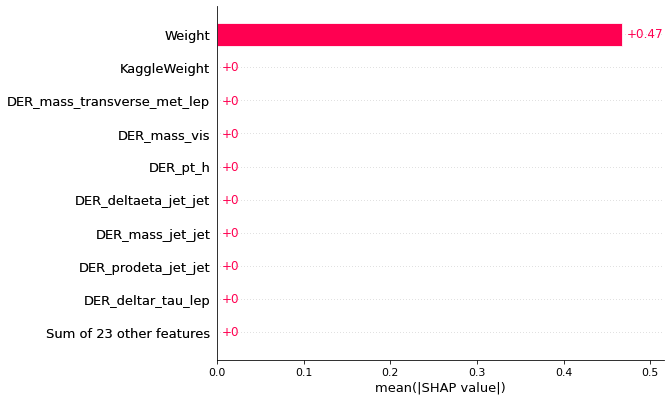

In [32]:
shap.plots.bar(shap_values)

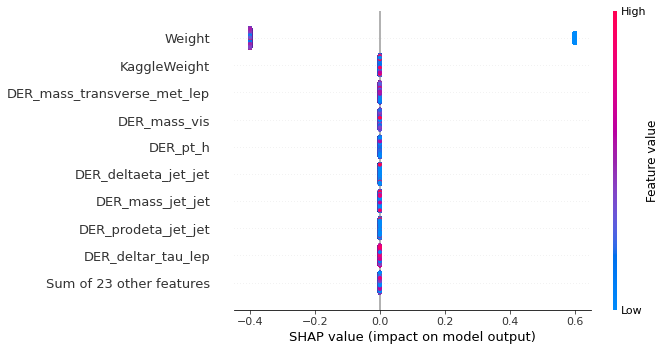

In [35]:
shap.plots.beeswarm(shap_values)

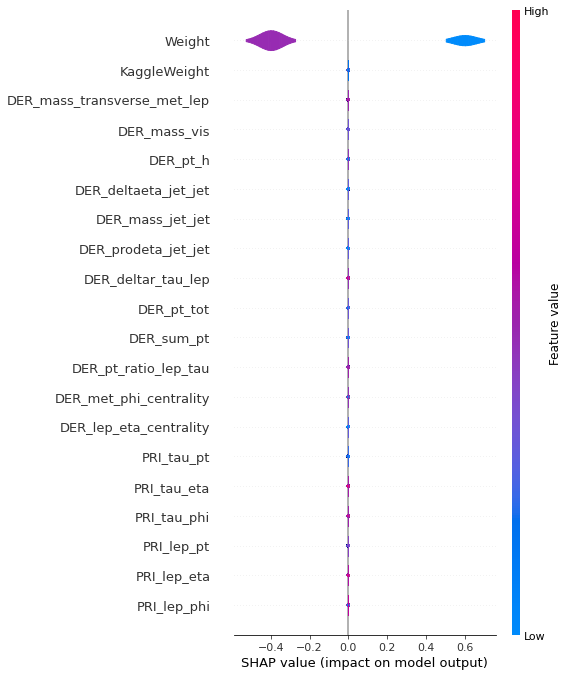

In [36]:
shap.summary_plot(shap_values, plot_type='violin')